#### Monte Carlo Simulation

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import hvplot.pandas
import plotly.express as px


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

In [4]:
# Set start and end dates of five years back from today.
# Formatting current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-02-14", tz="America/New_York").isoformat()

In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:

# Setting the tickers
tickers = ["FB","AMZN","NFLX","GOOG","SPY"]

# Setting timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Getting current closing prices for the tickers
df_tech_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
FB = df_tech_stock_data[df_tech_stock_data['symbol']=='FB'].drop('symbol', axis=1)
# APPL = df_tech_stock_data[df_tech_stock_data['symbol']=='APPL'].drop('symbol', axis=1)
SPY = df_tech_stock_data[df_tech_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AMZN = df_tech_stock_data[df_tech_stock_data['symbol']=='AMZN'].drop('symbol', axis=1)
NFLX = df_tech_stock_data[df_tech_stock_data['symbol']=='NFLX'].drop('symbol', axis=1)
GOOG = df_tech_stock_data[df_tech_stock_data['symbol']=='GOOG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_tech_stock_data = pd.concat([GOOG,SPY,AMZN,NFLX,FB],axis=1, keys=['GOOG','SPY','AMZN','NFLX','FB'])

# Preview DataFrame
df_tech_stock_data.head()
df_tech_stock_data.tail()


GOOG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2023-02-08 05:00:00+00:00  102.69  103.580  98.455  100.00  73667738   
2023-02-09 05:00:00+00:00  100.54  100.610  93.860   95.46  97843496   
2023-02-10 05:00:00+00:00   95.74   97.020  94.530   94.86  49325275   
2023-02-13 05:00:00+00:00   95.01   95.350  94.050   95.00  43116559   
2023-02-14 05:00:00+00:00   94.66   95.175  92.650   94.95  42505918   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2023-02-08 05:00:00+00:00      687581  100.292608  413.13  414.53  409.930   
2023-02-09 05:00:00+00:00      870413   95.558989  414.41  414.57  405.810   
2023-02-10 05:00:00+00:00      418697   95.366307  405.86  408.44  405.010   
2023-02-13 05:00:00+00:00      358711   94.762998  408.72  412.97  408.240   
2023-02-14 05:00:00+00:00      401236   94.091834  411.24  415.05  408.511   

                           ...     NFLX                           FB           \
                           ...   volume trade_count        vwap open high low   
timestamp                  ...                                                  
2023-02-08 05:00:00+00:00  ...  6257088      110837  364.534783  NaN  NaN NaN   
2023-02-09 05:00:00+00:00  ...  6904750      118911  367.981924  NaN  NaN NaN   
2023-02-10 05:00:00+00:00  ...  7291096      137480  352.290413  NaN  NaN NaN   
2023-02-13 05:00:00+00:00  ...  7148643      121618  354.784016  NaN  NaN NaN   
2023-02-14 05:00:00+00:00  ...  4623859       91146  358.792861  NaN  NaN NaN   

                                                         
                          close volume trade_count vwap  
timestamp                                                
2023-02-08 05:00:00+00:00   NaN    NaN         NaN  NaN  
2023-02-09 05:00:00+00:00   NaN    NaN         NaN  NaN  
2023-02-10 05:00:00+00:00   NaN    NaN         NaN  NaN  
2023-02-13 05:00:00+00:00   NaN    NaN         NaN  NaN  
2023-02-14 05:00:00+00:00   NaN    NaN         NaN  NaN  

[5 rows x 35 columns]

In [7]:
df_tech_stock_data.dropna()

GOOG                                          \
                              open       high        low    close   volume   
timestamp                                                                    
2020-01-02 05:00:00+00:00  1341.55  1368.1400  1341.5500  1367.37  1406731   
2020-01-03 05:00:00+00:00  1347.86  1372.5000  1345.5436  1360.66  1187006   
2020-01-06 05:00:00+00:00  1350.00  1396.5000  1350.0000  1394.21  1733159   
2020-01-07 05:00:00+00:00  1397.94  1402.9900  1390.3800  1393.34  1511693   
2020-01-08 05:00:00+00:00  1392.08  1411.5800  1390.8400  1404.32  1529600   
...                            ...        ...        ...      ...      ...   
2022-06-02 04:00:00+00:00  2283.76  2357.9600  2266.1600  2354.92  1362535   
2022-06-03 04:00:00+00:00  2319.85  2327.2900  2273.3600  2290.92  1090067   
2022-06-06 04:00:00+00:00  2334.85  2387.9696  2330.5658  2340.21  1172019   
2022-06-07 04:00:00+00:00  2312.96  2354.9725  2302.5101  2344.59  1313812   
2022-06-08 04:00:00+00:00  2337.53  2372.9200  2333.9350  2344.76  1123412   

                                                         SPY           \
                          trade_count         vwap      open     high   
timestamp                                                               
2020-01-02 05:00:00+00:00       41393  1358.286088  323.5400  324.890   
2020-01-03 05:00:00+00:00       28661  1363.616032  321.1600  323.640   
2020-01-06 05:00:00+00:00       43017  1387.410598  320.4900  323.730   
2020-01-07 05:00:00+00:00       37866  1396.421509  323.0200  323.540   
2020-01-08 05:00:00+00:00       38568  1403.643663  322.9400  325.780   
...                               ...          ...       ...      ...   
2022-06-02 04:00:00+00:00       81788  2328.759124  409.4200  417.440   
2022-06-03 04:00:00+00:00       74098  2294.409467  412.3801  414.040   
2022-06-06 04:00:00+00:00       75388  2352.360827  414.7800  416.609   
2022-06-07 04:00:00+00:00       60254  2335.510399  408.1000  416.220   
2022-06-08 04:00:00+00:00       59651  2350.614195  413.9300  415.820   

                                     ...     NFLX                          \
                                low  ...   volume trade_count        vwap   
timestamp                            ...                                    
2020-01-02 05:00:00+00:00  322.5300  ...  4348493       59205  327.994995   
2020-01-03 05:00:00+00:00  321.1000  ...  3807966       52202  327.435520   
2020-01-06 05:00:00+00:00  320.3600  ...  5668577       74751  331.826407   
2020-01-07 05:00:00+00:00  322.2400  ...  4742458       64781  331.955986   
2020-01-08 05:00:00+00:00  322.6700  ...  7109117       87232  337.815970   
...                             ...  ...      ...         ...         ...   
2022-06-02 04:00:00+00:00  407.0400  ...  9623801      154132  200.953657   
2022-06-03 04:00:00+00:00  409.5100  ...  7021482      111125  199.978037   
2022-06-06 04:00:00+00:00  410.5523  ...  5326399       94389  198.334783   
2022-06-07 04:00:00+00:00  407.6100  ...  4810007       80368  196.939787   
2022-06-08 04:00:00+00:00  410.3800  ...  7222211      119139  203.408597   

                                 FB                                         \
                               open     high       low   close      volume   
timestamp                                                                    
2020-01-02 05:00:00+00:00  206.7500  209.790  206.2700  209.78  12090707.0   
2020-01-03 05:00:00+00:00  207.2135  210.400  206.9500  208.67  11197416.0   
2020-01-06 05:00:00+00:00  206.7000  212.780  206.5200  212.60  17879436.0   
2020-01-07 05:00:00+00:00  212.8200  214.580  211.7500  213.06  15111857.0   
2020-01-08 05:00:00+00:00  213.0000  216.240  212.6121  215.22  13492703.0   
...                             ...      ...       ...     ...         ...   
2022-06-02 04:00:00+00:00  188.4500  200.935  187.7300  198.86  31818624.0   
2022-06-03 04:00:00+00:00  195.9800  196.610  189.7800 

In [8]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = np.array([.2,.2,.2,.2,.2])

ten_years_cumulative_returns = MCSimulation(
    portfolio_data = df_tech_stock_data ,
    weights=[.2,.2,.2,.2,.2],
    num_simulation=500,
    num_trading_days=252*10
)
ten_years_cumulative_returns

In [9]:
ten_years_cumulative_returns.portfolio_data

GOOG                                          \
                              open      high        low    close    volume   
timestamp                                                                    
2020-01-02 05:00:00+00:00  1341.55  1368.140  1341.5500  1367.37   1406731   
2020-01-03 05:00:00+00:00  1347.86  1372.500  1345.5436  1360.66   1187006   
2020-01-06 05:00:00+00:00  1350.00  1396.500  1350.0000  1394.21   1733159   
2020-01-07 05:00:00+00:00  1397.94  1402.990  1390.3800  1393.34   1511693   
2020-01-08 05:00:00+00:00  1392.08  1411.580  1390.8400  1404.32   1529600   
...                            ...       ...        ...      ...       ...   
2023-02-08 05:00:00+00:00   102.69   103.580    98.4550   100.00  73667738   
2023-02-09 05:00:00+00:00   100.54   100.610    93.8600    95.46  97843496   
2023-02-10 05:00:00+00:00    95.74    97.020    94.5300    94.86  49325275   
2023-02-13 05:00:00+00:00    95.01    95.350    94.0500    95.00  43116559   
2023-02-14 05:00:00+00:00    94.66    95.175    92.6500    94.95  42505918   

                                                                    SPY  \
                          trade_count         vwap daily_return    open   
timestamp                                                                 
2020-01-02 05:00:00+00:00       41393  1358.286088          NaN  323.54   
2020-01-03 05:00:00+00:00       28661  1363.616032    -0.004907  321.16   
2020-01-06 05:00:00+00:00       43017  1387.410598     0.024657  320.49   
2020-01-07 05:00:00+00:00       37866  1396.421509    -0.000624  323.02   
2020-01-08 05:00:00+00:00       38568  1403.643663     0.007880  322.94   
...                               ...          ...          ...     ...   
2023-02-08 05:00:00+00:00      687581   100.292608    -0.074417  413.13   
2023-02-09 05:00:00+00:00      870413    95.558989    -0.045400  414.41   
2023-02-10 05:00:00+00:00      418697    95.366307    -0.006285  405.86   
2023-02-13 05:00:00+00:00      358711    94.762998     0.001476  408.72   
2023-02-14 05:00:00+00:00      401236    94.091834    -0.000526  411.24   

                                   ...        NFLX                     FB  \
                             high  ...        vwap daily_return      open   
timestamp                          ...                                      
2020-01-02 05:00:00+00:00  324.89  ...  327.994995          NaN  206.7500   
2020-01-03 05:00:00+00:00  323.64  ...  327.435520    -0.011855  207.2135   
2020-01-06 05:00:00+00:00  323.73  ...  331.826407     0.030469  206.7000   
2020-01-07 05:00:00+00:00  323.54  ...  331.955986    -0.015127  212.8200   
2020-01-08 05:00:00+00:00  325.78  ...  337.815970     0.025729  213.0000   
...                           ...  ...         ...          ...       ...   
2023-02-08 05:00:00+00:00  414.53  ...  364.534783     0.010690       NaN   
2023-02-09 05:00:00+00:00  414.57  ...  367.981924    -0.011804       NaN   
2023-02-10 05:00:00+00:00  408.44  ...  352.290413    -0.041766       NaN   
2023-02-13 05:00:00+00:00  412.97  ...  354.784016     0.032272       NaN   
2023-02-14 05:00:00+00:00  415.05  ...  358.792861     0.003877       NaN   

                                                                             \
                             high       low   close      volume trade_count   
timestamp                                                                     
2020-01-02 05:00:00+00:00  209.79  206.2700  209.78  12090707.0    101276.0   
2020-01-03 05:00:00+00:00  210.40  206.9500  208.67  11197416.0     98107.0   
2020-01-06 05:00:00+00:00  212.78  206.5200  212.60  17879436.0    118383.0   
2020-01-07 05:00:00+00:00  214.58  211.7500  213.06  15111857.0    114086.0   
2020-01-08 05:00:00+00:00  216.24  212.6121  215.22  13492703.0    107572.0   
...                           ...       ...     ...         ...         ...   
2023-02-08 05:00:00+00:00     NaN       NaN     NaN         NaN         NaN   
2023-02-09 05:00:

In [10]:
ten_years_cumulative_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lilybro/Desktop/project-folder/Project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2517,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2518,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2519,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

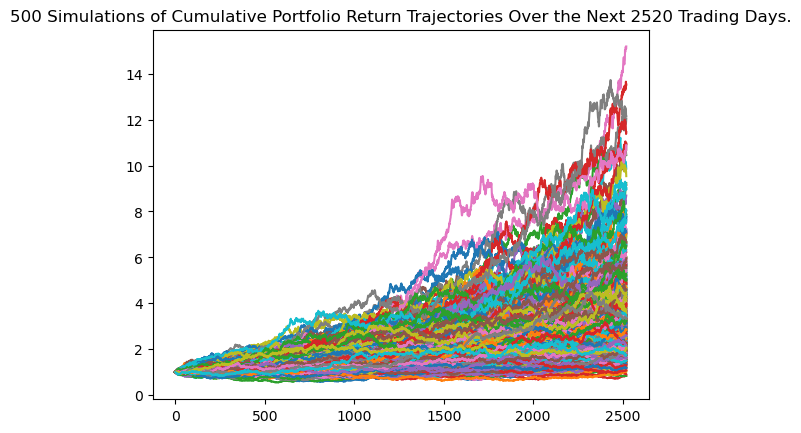

In [17]:
# Plot simulation outcomes
ten_years_cumulative_returns.plot_simulation()

In [18]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-02-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["VOO", "VGT",'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for VOO and VGT
df_etf = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
VOO = df_etf[df_etf['symbol']=='VOO'].drop('symbol', axis=1)
VGT = df_etf[df_etf['symbol']=='VGT'].drop('symbol', axis=1)
SPY = df_etf[df_etf['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_etf = pd.concat([VOO,VGT,SPY],axis=1, keys=['VOO','VGT','SPY'])

# Preview DataFrame
df_etf.head()
df_etf.tail()

VOO                                     \
                              open    high       low   close   volume   
timestamp                                                               
2023-02-08 05:00:00+00:00  379.690  380.93  376.7300  377.34  2922597   
2023-02-09 05:00:00+00:00  380.970  381.00  372.9486  374.11  3328606   
2023-02-10 05:00:00+00:00  373.000  375.39  372.2000  375.02  3256705   
2023-02-13 05:00:00+00:00  375.649  379.44  375.2000  379.35  2980600   
2023-02-14 05:00:00+00:00  377.960  381.42  375.4500  379.21  4605136   

                                                      VGT                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2023-02-08 05:00:00+00:00       67226  378.352946  369.48  372.209  364.370   
2023-02-09 05:00:00+00:00       68734  376.734588  370.70  371.360  361.700   
2023-02-10 05:00:00+00:00       63885  374.182561  360.35  362.015  357.690   
2023-02-13 05:00:00+00:00       63779  378.192463  362.78  368.100  362.075   
2023-02-14 05:00:00+00:00       69454  378.800798  365.44  371.210  363.130   

                           ...                                      SPY  \
                           ...   volume trade_count        vwap    open   
timestamp                  ...                                            
2023-02-08 05:00:00+00:00  ...  1275502       16721  366.700111  413.13   
2023-02-09 05:00:00+00:00  ...   390816        9381  366.758308  414.41   
2023-02-10 05:00:00+00:00  ...   337250        9901  360.105391  405.86   
2023-02-13 05:00:00+00:00  ...   978478       14683  366.446200  408.72   
2023-02-14 05:00:00+00:00  ...   500436       11309  368.487218  411.24   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2023-02-08 05:00:00+00:00  414.53  409.930  410.65  76239095      529629   
2023-02-09 05:00:00+00:00  414.57  405.810  407.09  78709874      567083   
2023-02-10 05:00:00+00:00  408.44  405.010  408.04  70769715      489779   
2023-02-13 05:00:00+00:00  412.97  408.240  412.83  64913539      426599   
2023-02-14 05:00:00+00:00  415.05  408.511  412.64  87958994      623872   

                                       
                                 vwap  
timestamp                              
2023-02-08 05:00:00+00:00  411.925098  
2023-02-09 05:00:00+00:00  409.794927  
2023-02-10 05:00:00+00:00  407.008915  
2023-02-13 05:00:00+00:00  411.386908  
2023-02-14 05:00:00+00:00  412.117399  

[5 rows x 21 columns]

In [19]:
df_etf.dropna()

VOO                                     \
                              open    high       low   close   volume   
timestamp                                                               
2020-01-02 05:00:00+00:00  297.290  298.45  296.3400  298.42  3149761   
2020-01-03 05:00:00+00:00  295.220  297.36  295.0400  296.24  3248060   
2020-01-06 05:00:00+00:00  294.420  297.42  294.3500  297.35  2782110   
2020-01-07 05:00:00+00:00  296.820  297.27  296.0611  296.53  2384732   
2020-01-08 05:00:00+00:00  296.710  299.31  296.4700  298.06  3724359   
...                            ...     ...       ...     ...      ...   
2023-02-08 05:00:00+00:00  379.690  380.93  376.7300  377.34  2922597   
2023-02-09 05:00:00+00:00  380.970  381.00  372.9486  374.11  3328606   
2023-02-10 05:00:00+00:00  373.000  375.39  372.2000  375.02  3256705   
2023-02-13 05:00:00+00:00  375.649  379.44  375.2000  379.35  2980600   
2023-02-14 05:00:00+00:00  377.960  381.42  375.4500  379.21  4605136   

                                                      VGT                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2020-01-02 05:00:00+00:00       26846  297.278811  247.05  249.360  246.6400   
2020-01-03 05:00:00+00:00       34024  296.477589  245.93  248.390  245.9001   
2020-01-06 05:00:00+00:00       24415  295.912195  244.43  247.630  243.8400   
2020-01-07 05:00:00+00:00       20909  296.517868  247.87  248.555  247.0200   
2020-01-08 05:00:00+00:00       24639  297.720142  247.69  251.158  247.3800   
...                               ...         ...     ...      ...       ...   
2023-02-08 05:00:00+00:00       67226  378.352946  369.48  372.209  364.3700   
2023-02-09 05:00:00+00:00       68734  376.734588  370.70  371.360  361.7000   
2023-02-10 05:00:00+00:00       63885  374.182561  360.35  362.015  357.6900   
2023-02-13 05:00:00+00:00       63779  378.192463  362.78  368.100  362.0750   
2023-02-14 05:00:00+00:00       69454  378.800798  365.44  371.210  363.1300   

                           ...                                      SPY  \
                           ...   volume trade_count        vwap    open   
timestamp                  ...                                            
2020-01-02 05:00:00+00:00  ...  1415256       13824  248.026042  323.54   
2020-01-03 05:00:00+00:00  ...  1632585       15121  247.550554  321.16   
2020-01-06 05:00:00+00:00  ...   525610        6959  246.261497  320.49   
2020-01-07 05:00:00+00:00  ...   389994        6345  247.898237  323.02   
2020-01-08 05:00:00+00:00  ...   622089        9255  249.664227  322.94   
...                        ...      ...         ...         ...     ...   
2023-02-08 05:00:00+00:00  ...  1275502       16721  366.700111  413.13   
2023-02-09 05:00:00+00:00  ...   390816        9381  366.758308  414.41   
2023-02-10 05:00:00+00:00  ...   337250        9901  360.105391  405.86   
2023-02-13 05:00:00+00:00  ...   978478       14683  366.446200  408.72   
2023-02-14 05:00:00+00:00  ...   500436       11309  368.487218  411.24   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2020-01-02 05:00:00+00:00  324.89  322.530  324.87  59253833      304884   
2020-01-03 05:00:00+00:00  323.64  321.100  322.43  77783121      358500   
2020-01-06 05:00:00+00:00  323.73  320.360  323.73  55817168      255767   
2020-01-07 05:00:00+00:00  323.54  322.240  322.74  42874811      226059   
2020-01-08 05:00:00+00:00  325.78  322.670  324.42  68435753      340004   
...                           ...      ...     ...       ...         ...   
2023-02-08 05:00:00+00:00  414.53  409.930  410.65  76239095      529629   
2023-02-09 05:00:00+00:00  414.57  405.810  407.09  78709874      567083   


In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
etf_ten_years_cumulative_returns = MCSimulation(
    portfolio_data = df_etf ,
    weights=[.3,.3,.4],
    num_simulation=500,
    num_trading_days=252*10
)
etf_ten_years_cumulative_returns

In [21]:
etf_ten_years_cumulative_returns.portfolio_data

VOO                                     \
                              open    high       low   close   volume   
timestamp                                                               
2020-01-02 05:00:00+00:00  297.290  298.45  296.3400  298.42  3149761   
2020-01-03 05:00:00+00:00  295.220  297.36  295.0400  296.24  3248060   
2020-01-06 05:00:00+00:00  294.420  297.42  294.3500  297.35  2782110   
2020-01-07 05:00:00+00:00  296.820  297.27  296.0611  296.53  2384732   
2020-01-08 05:00:00+00:00  296.710  299.31  296.4700  298.06  3724359   
...                            ...     ...       ...     ...      ...   
2023-02-08 05:00:00+00:00  379.690  380.93  376.7300  377.34  2922597   
2023-02-09 05:00:00+00:00  380.970  381.00  372.9486  374.11  3328606   
2023-02-10 05:00:00+00:00  373.000  375.39  372.2000  375.02  3256705   
2023-02-13 05:00:00+00:00  375.649  379.44  375.2000  379.35  2980600   
2023-02-14 05:00:00+00:00  377.960  381.42  375.4500  379.21  4605136   

                                                                   VGT  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-02 05:00:00+00:00       26846  297.278811          NaN  247.05   
2020-01-03 05:00:00+00:00       34024  296.477589    -0.007305  245.93   
2020-01-06 05:00:00+00:00       24415  295.912195     0.003747  244.43   
2020-01-07 05:00:00+00:00       20909  296.517868    -0.002758  247.87   
2020-01-08 05:00:00+00:00       24639  297.720142     0.005160  247.69   
...                               ...         ...          ...     ...   
2023-02-08 05:00:00+00:00       67226  378.352946    -0.010956  369.48   
2023-02-09 05:00:00+00:00       68734  376.734588    -0.008560  370.70   
2023-02-10 05:00:00+00:00       63885  374.182561     0.002432  360.35   
2023-02-13 05:00:00+00:00       63779  378.192463     0.011546  362.78   
2023-02-14 05:00:00+00:00       69454  378.800798    -0.000369  365.44   

                                    ...                              SPY  \
                              high  ...        vwap daily_return    open   
timestamp                           ...                                    
2020-01-02 05:00:00+00:00  249.360  ...  248.026042          NaN  323.54   
2020-01-03 05:00:00+00:00  248.390  ...  247.550554    -0.010508  321.16   
2020-01-06 05:00:00+00:00  247.630  ...  246.261497     0.003324  320.49   
2020-01-07 05:00:00+00:00  248.555  ...  247.898237    -0.000121  323.02   
2020-01-08 05:00:00+00:00  251.158  ...  249.664227     0.010545  322.94   
...                            ...  ...         ...          ...     ...   
2023-02-08 05:00:00+00:00  372.209  ...  366.700111    -0.012662  413.13   
2023-02-09 05:00:00+00:00  371.360  ...  366.758308    -0.004220  414.41   
2023-02-10 05:00:00+00:00  362.015  ...  360.105391    -0.006357  405.86   
2023-02-13 05:00:00+00:00  368.100  ...  366.446200     0.017005  408.72   
2023-02-14 05:00:00+00:00  371.210  ...  368.487218     0.005310  411.24   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2020-01-02 05:00:00+00:00  324.89  322.530  324.87  59253833      304884   
2020-01-03 05:00:00+00:00  323.64  321.100  322.43  77783121      358500   
2020-01-06 05:00:00+00:00  323.73  320.360  323.73  55817168      255767   
2020-01-07 05:00:00+00:00  323.54  322.240  322.74  42874811      226059   
2020-01-08 05:00:00+00:00  325.78  322.670  324.42  68435753      340004   
...                           ...      ...     ...       ...         ...   
2023-02-08 05:00:00+00:00  414.53  409.930  410.65  76239095      529629   
2023-02-09 05:00:00+00:00  414.57  405.810  407.09  78709874      567083   
2023-02-10 05:00:00+00:00  408.44  405.010  408.04  70769715      4897

In [22]:
etf_ten_years_cumulative_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lilybro/Desktop/project-folder/Project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985966,1.002503,1.013036,0.996373,1.021107,0.987098,0.990526,0.996699,1.007779,1.000457,...,1.008569,0.999313,0.987658,1.009360,0.998383,1.007757,0.994664,0.987315,0.994851,1.000008
2,0.981457,1.030854,1.021232,0.996058,1.023132,0.966604,0.984773,0.984386,1.014547,1.002942,...,1.015357,0.976738,0.979396,1.010969,0.996487,1.019382,0.998060,1.009471,1.004555,0.998548
3,0.963773,1.023373,1.017279,1.000556,1.046285,0.955547,0.986333,0.968452,1.025932,1.016969,...,1.023195,0.966061,0.980744,1.006696,1.003151,1.024404,0.989860,1.022491,0.998172,1.000623
4,0.948474,1.025987,1.017595,0.989546,1.033375,0.958514,0.996874,0.979264,1.032364,1.030994,...,1.042510,0.976636,0.993058,0.982499,1.005663,1.027341,0.984678,1.013064,0.996428,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.859192,1.845099,2.873013,7.411833,7.006523,5.819574,6.029202,4.506660,2.705332,4.037767,...,2.042053,2.381395,3.819067,4.857221,3.254608,4.380367,6.019898,2.375590,3.123045,3.959043
2517,2.918033,1.878734,2.859664,7.520938,7.112640,5.895975,6.020749,4.489584,2.687138,3.934275,...,2.034314,2.377680,3.756106,4.884750,3.228772,4.330977,5.938801,2.370146,3.087662,3.925947
2518,2.902551,1.890863,2.871061,7.580856,7.117018,5.831011,6.054298,4.489397,2.701526,3.915026,...,2.025256,2.366266,3.724335,4.847372,3.270034,4.336136,5.959156,2.368421,3.046681,3.943160
2519,2.920097,1.924314,2.894108,7.529620,7.160604,5.818732,6.101635,4.455872,2.743169,3.921907,...,2.021340,2.392833,3.748802,4.898044,3.298851,4.401896,5.879810,2.377963,3.038257,3.961351


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

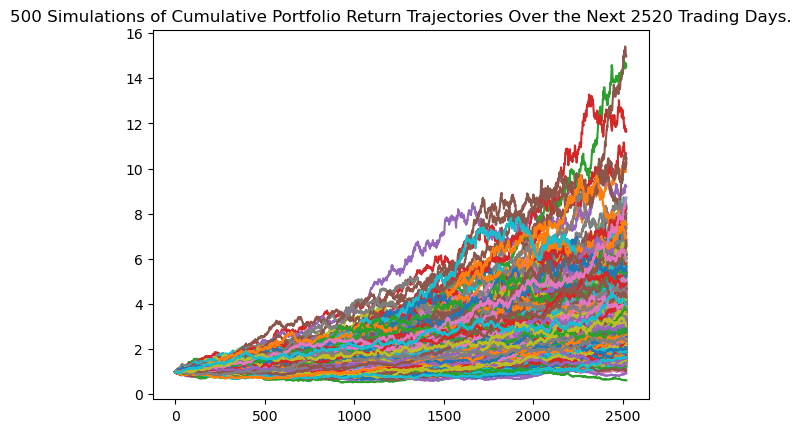

In [23]:
# Plot simulation outcomes
etf_ten_years_cumulative_returns.plot_simulation()